# Ising Model 
For a graph, $G = (E,V)$, defined by a set of edges, $E$, and vertices, $V$, we want to represent an Ising model, where the edge weights, $w_{ij}$ are given by the spin interactions, i.e., $w_{ij} = J_{ij}$.

Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H} = \sum_{(i,j)\in E}J_{ij} s_is_j + \sum_i \mu_i s_i.$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the sumation runs over all edges in the graph. 
**Note:** As we saw before, this Hamiltonian operator is simple, in that a single `BitString` returns a single energy. This is because the matrix representation of the Hamiltonian operator in the computational basis (i.e., basis of all possible `BitString`'s) is a diagonal matrix. However, most quantum mechanical Hamiltonians will not be diagonal, and in that case applying $H$ to a single `BitString` would generate multiple `BitString`'s.   



# Thermodynamic averages
In the previous notebook, we used the Hamiltonian (which was defined as a graph) to find the lowest "energy" configuration (`BitString`). However, often times we want to compute average values of an observable over all possible configurations. Imagine that you have a bag containing some mixture of `BitString`'s. If we reach into the back and pull out a `BitString` at random, the probability of observing the specific `BitString` $\ket{\alpha}$ will be denoted as $P(\alpha)$. Each possible `BitString` has its own probability. 

Given this situation, what is the average energy in the bag? To answer this, we could just pull out each `BitString`, measure it's energy, add them all up, and divide by the total number of `BitString`s. Or if we knew the probabilty of observing each possible `BitString`, we could equivalently, add up the probabilities times the energy, $E(\alpha)$, of each possible `BitString`:
$$
\left<E\right> = \sum_\alpha P(\alpha)E(\alpha)
$$ 
In this sense, the average energy (or any average quantity) depends on the given probability distribution in the bag. 

While there are an infinite number of possible probability distributions one might interact with, a very common distribution (and the one we will focus on) is the `Gibbs Distribution`, also called the `Boltzmann Distribution`:
$$
P(\alpha) = \frac{e^{-\beta E(\alpha)}}{Z} = \frac{e^{-\beta E(\alpha)}}{\sum_{\alpha'}e^{-\beta E(\alpha')}}
$$
where $\beta$ sometimes has a physical meaning of $\beta = 1/kT$, where $k$ is the Boltzmann constant, $k = 1.38064852 \times 10^{-23} J/K$ and $T$ is the temperature in Kelvin. We generally refer to the normalization constant $Z$ as the partition function. 

This expression, defines the probability of observing a particular configuration of spins, $\alpha$. As you can see, the probability of pulling $\alpha$ out of your bag decays exponentially with increasing energy of $\alpha$, $E(\alpha)$. This expression governs the behavior of the vast majority of physical systems, meaning that in nature at low temperatures, one typically expects to observe the lowest possible configuration of a system.

If the population (e.g., the bag of `BitString`s) is known to form a Boltzmann distribution, the expectation value of any quantity, `A`, can be defined as:
$$
\left<A\right> = \frac{\sum_\alpha e^{-\beta E(\alpha)}A(\alpha)}{Z}.
$$

# Properties

For any fixed state, $\alpha$, the `magnetization` ($M$) is proportional to the _excess_ number of spins pointing up or down while the energy is given by the
Hamiltonian:
$$M(\alpha) = N_{\text{up}}(\alpha) - N_{\text{down}}(\alpha).$$
As a dynamical, fluctuating system, each time you measure the magnetization, the system might be in a different state ($\alpha$) and so you'll get a different number!
However, we already know what the probability of measuring any particular $\alpha$ is, so in order to compute the average magnetization, $\left<M\right>$, we just need to multiply the magnetization of each possible configuration times the probability of it being measured, and then add them all up!
$$ \left<M\right> = \sum_\alpha M(\alpha)P(\alpha).$$
In fact, any average value can be obtained by adding up the value of an individual configuration multiplied by it's probability:
$$ \left<E\right> = \sum_\alpha E(\alpha)P(\alpha).$$

This means that to exactly obtain any average value (also known as an `expectation value`) computationally, we must compute the both the value and probability of all possible configurations. This becomes extremely expensive as the number of spins ($N$) increases.

The expectation values we will compute in this notebook are
\begin{align}
\text{Energy} &= \left<E\right> \\
\text{Magnetization} &= \left<M\right> \\
\text{Heat Capacity} &= \left(\left<E^2\right>-\left<E\right>^2\right)T^{-2} \\
\text{Magnetic Susceptibility} &= \left(\left<M^2\right>-\left<M\right>^2\right)T^{-1}
\end{align}

# Expectation values for Boltzmann Distribution

In this notebook, we will write code to compute the expectation values of a few different properties, at a given temperature. We will then see how these change with temperature. 

## Load packages

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import montecarlo
import graphbuilder

## Create a graph that defines the Ising interactions

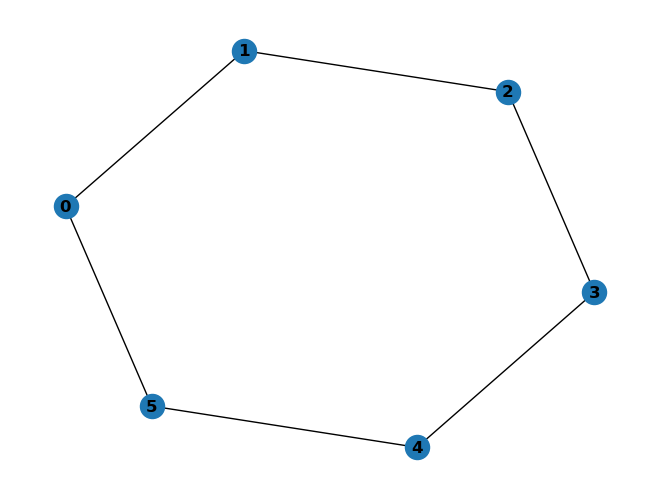

In [2]:
G = graphbuilder.build_graph2()
N = G.number_of_edges()

# Now Draw the graph. 
plt.figure(1)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [3]:
# Define a new configuration instance for a 6-site lattice
conf = montecarlo.BitString(N)
ham = montecarlo.IsingHamiltonian(G)


In [4]:
# Compute the average values for Temperature = 1
E, M, HC, MS = ham.compute_average_values(1)


print(" E  = %12.8f" %E)
print(" M  = %12.8f" %M)
print(" HC = %12.8f" %HC)
print(" MS = %12.8f" %MS)

assert(np.isclose(E,  -11.95991923))
assert(np.isclose(M,   -0.00000000))
assert(np.isclose(HC,   0.31925472))
assert(np.isclose(MS,   0.01202961))


 E  = -11.95991901
 M  =  -0.00000000
 HC =   0.31925641
 MS =   0.01202967


# Properties vs Temperature (exact)

 Critical Temperature:   4.20000000 
     E:   -5.48996329
     M:   -0.00277427
     HC:   1.23610765
     MS:   0.53916942
 Critical Temperature:   2.20000000
 E = -10.21962764 @ T =   2.00000000


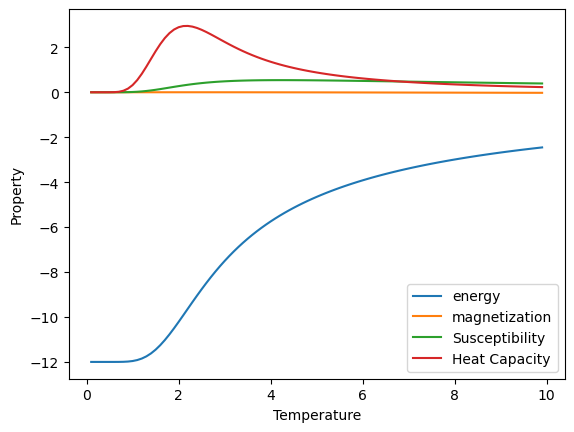

In [5]:
# Initialize lists that we will fill with the property vs. temperature data
e_list = []
e2_list = []
m_list = []
m2_list = []
T_list = []

for Ti in range(1,100):
    T = .1*Ti
    
    E, M, HC, MS = ham.compute_average_values(T)
    
    e_list.append(E)
    m_list.append(M)
    e2_list.append(HC)
    m2_list.append(MS)
    T_list.append(T)


plt.plot(T_list, e_list, label="energy");
plt.plot(T_list, m_list, label="magnetization");
plt.plot(T_list, m2_list, label="Susceptibility");
plt.plot(T_list, e2_list, label="Heat Capacity");
plt.legend();
plt.xlabel("Temperature")
plt.ylabel("Property")


Tc_ind = np.argmax(m2_list)
print(" Critical Temperature: %12.8f " %(T_list[Tc_ind]))
print("     E:  %12.8f" %(e_list[Tc_ind]))
print("     M:  %12.8f" %(m_list[Tc_ind]))
print("     HC: %12.8f" %(e2_list[Tc_ind]))
print("     MS: %12.8f" %(m2_list[Tc_ind]))
Tc2 = T_list[np.argmax(e2_list)]
print(" Critical Temperature: %12.8f" %(Tc2))

print(" E = %12.8f @ T = %12.8f"% (e_list[T_list.index(2.00)], 2.0))

assert(np.isclose(Tc2, 2.2))

----


# Metropolis Sampling

These exact calculations pose a drastic problem from a practical perspective. As `N` becomes large it is evident that computations become a daunting task if calculated in this manner. Thus a better numerical alternative would be to use a simulation to generate data over the ‘representative states’. Because each computed value of a configuration gets weighted by it's probability, very high energy states (which have negligible probabilities due to the Boltzmann distribution) will not contribute to the overall sum. What we'd like to do instead, is to sample over *only* those configurations that actively contribute. This is a form of biased sampling which essentially boils down to satisfying the following condition where

**generated frequency = actual probability**.

We could choose to randomly `sample` from this full set of configurations, but this will not converge quickly. By randomly sampling, we simply mean to pick a configuration, $s_i$, at random, where all configurations have equal probability of being selected. However, what if we *knew* a priori what the equilibrium probability distribution was? Then we could select configurations not randomly, but rather where a given configuration's probability of being selected was proportional to its equilibrium population,

$$
\frac{1}{Z}e^{-E(s_i)/T}.
$$

If each configuration had the thermodynamic probability of being sampled, then our average value would reduce to a simple arithmetic average over the samples:

$$
\left<A\right> = \frac{1}{M} \sum_{s_i}^{\in \text{Trajectory}} A(s_i).
$$

How can we carry out this fancy, biased sampling? - we can use a Markov process! We will *walk* randomly through configuration space, where the chance of take a particular step depends only on our current "position". For each configuration that we visit, we will compute properties that contribute to our average values. From our current configuration, we will propose a new randomly chosen configuration and decide whether or not to visit that new configuration (i.e. should we accept the proposed step). The rules we use to decide to visit a new configuration will be chosen to guarantee that the number of times we visit a configuration is exactly proportional to the equilibrium population of that configuration!

The choice to visit a new configuration will be made probabilistically. Assume we are currently visiting configuration $s_i$. We select configuration $s_j$ at random, and want to decide whether or not to visit $s_j$. If the $s_j$ is lower in energy than $s_i$, then we will visit the new configuration with 100% probability, 

$$
W(s_i\rightarrow s_j)=1.
$$

If the $s_j$ is *higher* in energy, then we will visit the new configuration with a probability given by,

$$
W(s_i\rightarrow s_j)=e^{-\left(E(s_j)-E(s_i)\right)/T}.
$$

This seems simple, but it's quite powerful! We want to use this to make our simulations much faster, at the cost of some statistical noise.

```
Initialize configuration, i 
Loop over Monte Carlo steps	    
	Loop over sites, n
		Propose new configuration, j, by flipping site, n.
		Compute flipping probability, W(i→j). 
		If  W(i→j) is greater than a randomly chosen number between 0 and 1, 
			Accept (i = j), 
		else: 
			Reject 
	Update average values with updated i
```

     E(ref):  
     E:  -12.30000000 E(ref):  -10.51917671 error:    -1.78e+00 
     M:    0.00000000 M(ref):    0.01365866 error:    -1.37e-02 
     HC:   0.00000000 HC(ref):   2.89395076 error:    -2.89e+00 
     MS:   0.00000000 MS(ref):   0.27362451 error:    -2.74e-01 


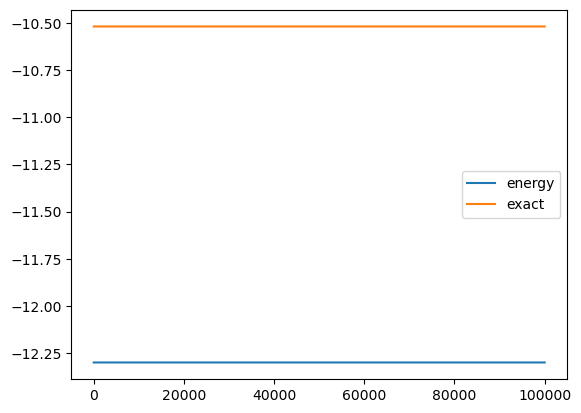

In [6]:
ham = montecarlo.IsingHamiltonian(G).set_mu([.1 for i in range(N)])


# Set Temperature 
T = 2 


# Run exact average values for comparison
Eref, Mref, HCref, MSref = ham.compute_average_values(T)
print("     E(ref):  " %(Eref))


# Run montecarlo
mc = montecarlo.metropolis(ham)
E, M = mc.run(T=T, n_samples=100000, n_burn=100)


Eavg = np.mean(E)
Estd = np.std(E)
Mavg = np.mean(M)
Mstd = np.std(M)

HC = (Estd**2)/(T**2)
MS = (Mstd**2)/T

print("     E:  %12.8f E(ref):  %12.8f error: %12.2e " %(Eavg, Eref, Eavg - Eref))
print("     M:  %12.8f M(ref):  %12.8f error: %12.2e " %(Mavg, Mref, Mavg - Mref))
print("     HC: %12.8f HC(ref): %12.8f error: %12.2e " %(HC, HCref, HC - HCref))
print("     MS: %12.8f MS(ref): %12.8f error: %12.2e " %(MS, MSref, MS - MSref))


def running_average(data):
    N = len(data)
    r_avg = np.zeros(N)

    if N == 0:
        return r_avg

    r_avg[0] = data[0]
    for i in range(1, N):
        r_avg[i] = (r_avg[i - 1] * (i) + data[i]) / (i + 1)
    
    return r_avg

plt.plot(running_average(E), label="energy");
plt.plot([Eref]*len(E), label="exact");
plt.legend();
# plt.ylim(-10.5, -10);


# Energy/Magnetization vs Temperature (Metropolis Sampling)

In [7]:
def run_T_scan(ham, conf, Tstep=.1, Tmax=10, n_mc_steps=2000, n_burn=200):
    
    N = len(conf.config)
    if len(ham.J) != N:
        error("dimensionMismatch")

    T_range = []
    e_vs_T = []
    m_vs_T = []
    e_vs_T_err = []
    m_vs_T_err = []
    heat_cap_vs_T = []
    magn_sus_vs_T = []
    
    mc = montecarlo.metropolis(ham)
    T = 1*Tstep
    for Ti in range(int(Tmax/Tstep)):
        T += Tstep
        
        E, M = mc.run(T=T, n_samples=n_mc_steps, n_burn=n_burn)

        Eavg = np.mean(E)
        Estd = np.std(E)
        Mavg = np.mean(M)
        Mstd = np.std(M)

        HC = (Estd**2)/(T**2)
        MS = (Mstd**2)/T
        
        T_range.append(T)

        e_vs_T.append(Eavg)
        e_vs_T_err.append(Estd/np.sqrt(len(E))*3)
        m_vs_T.append(Mavg)
        m_vs_T_err.append(Mstd/np.sqrt(len(M))*3)

        heat_cap_vs_T.append(HC)
        magn_sus_vs_T.append(MS)


    # plt.plot(T_range,e_vs_T, label="Energy")
    plt.errorbar(T_range,e_vs_T,yerr=e_vs_T_err, fmt='-', label="Energy")
    plt.errorbar(T_range,m_vs_T,yerr=m_vs_T_err, fmt='-', label="Magnetization")
    # plt.plot(T_range,m_vs_T, label="Magnetization")
    plt.plot(T_range,magn_sus_vs_T, label="Susceptibility")
    plt.plot(T_range,heat_cap_vs_T, label="Heat Capacity")
    plt.legend()

In [2]:
run_T_scan(ham, conf, Tstep=.1, Tmax=10, n_mc_steps=2000, n_burn=100)

NameError: name 'run_T_scan' is not defined